In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
data = pd.read_csv('test1.csv')

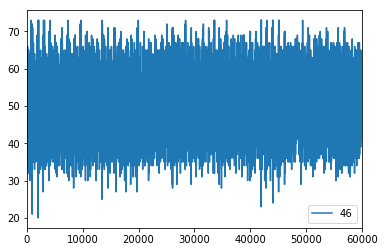

In [15]:
data.plot()

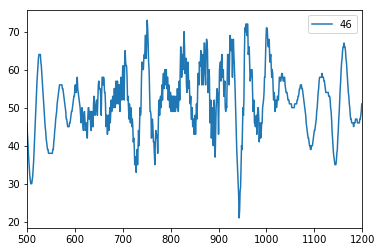

In [18]:
# first snoring instance
data[500:1200].plot()

In the above graph we can see that first snoring instance starts from time 600 to 1000 

In [25]:
# setting a date time index on data to perform seasonal decomposition
data.index = pd.DatetimeIndex(freq='d', start=0, periods=data.shape[0])

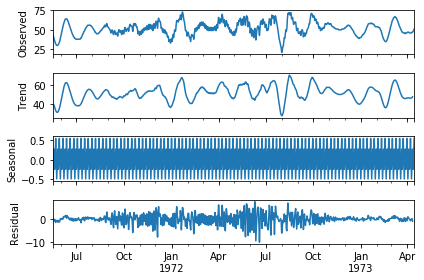

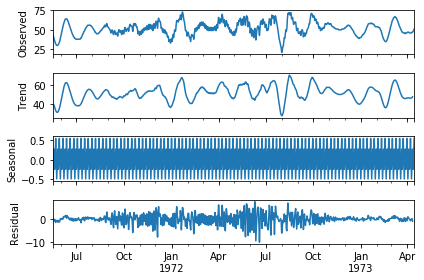

In [27]:
decomposition = seasonal_decompose(data[500:1200], model='additive')
decomposition.plot()

Here we can see the snoring instance in the 'Residual' graph 

In [30]:
# to find peaks in the graph, and their respective indexes
import peakutils
from peakutils.plot import plot as pplot

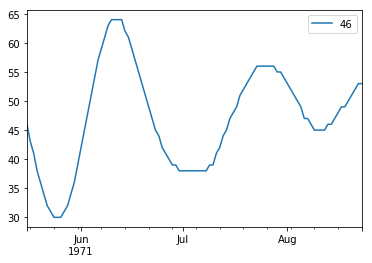

In [31]:
# non snoring data
test1 = data[500:600]
test1.plot()

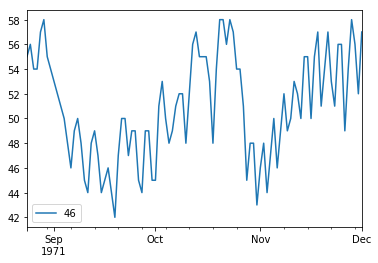

In [32]:
# snoring data
test2 = data[600:700]
test2.plot()

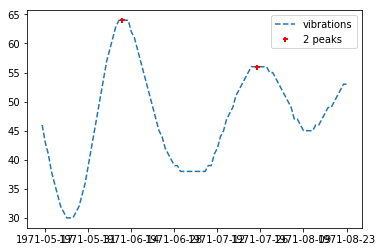

In [51]:
data.columns = ['vibrations']
test1 = data['vibrations'][500:600]
peaks = peakutils.indexes(test1, thres=0.5, min_dist=10)
len(peaks)
pplot(test1.index, test1, peaks)

As the above graph is of non snoring instance, we can see that peaks are less( 2 peaks in this case)

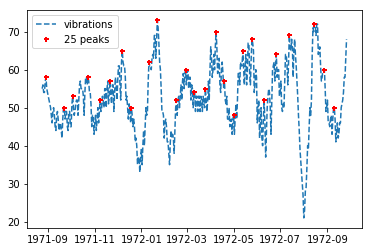

In [57]:
data.columns = ['vibrations']
test2 = data['vibrations'][600:1000]
peaks = peakutils.indexes(test2, thres=0.5, min_dist=10)
pplot(test2.index, test2, peaks)

Above graph shows snoring instance, we can see there are more peaks compared to non-snoring( 25 peaks in this case)

In [63]:
from detect_peaks import detect_peaks

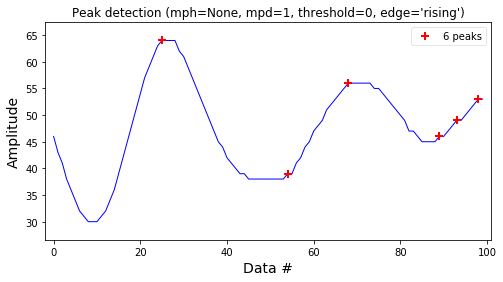

array([25, 54, 68, 89, 93, 98])

In [64]:
detect_peaks(test1, show=True)

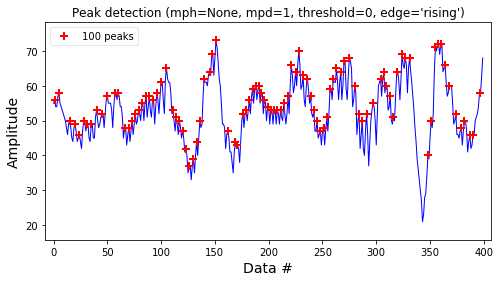

array([  1,   5,  15,  20,  24,  28,  31,  35,  40,  45,  50,  57,  60,
        66,  70,  73,  76,  79,  82,  86,  89,  92,  96, 100, 105, 111,
       114, 117, 120, 123, 126, 130, 133, 136, 140, 145, 147, 151, 162,
       169, 171, 176, 179, 182, 185, 188, 191, 193, 196, 199, 202, 205,
       208, 211, 214, 218, 221, 225, 228, 232, 236, 239, 242, 245, 248,
       251, 254, 257, 260, 263, 267, 270, 275, 280, 284, 287, 291, 297,
       304, 307, 309, 313, 316, 319, 324, 327, 331, 348, 351, 355, 357,
       360, 364, 368, 374, 379, 382, 387, 390, 396])

In [65]:
detect_peaks(test2, show=True)